Sama Samir AlNazer: {20240643}
Aijie Jiang:{20232084}
Raya Daher Al-Khatib: {20241416}
Kin Hang Ma:{20231804}
Mohammad Roummo:{20241623}

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
city_data=pd.read_csv('city_data.csv', sep='|', header=1)
city_data.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00


In [76]:
#We have to check for the amount of missing values in each column of the dataset, and look at the data types, so we use .info()
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             86 non-null     object 
 1   Population Density               85 non-null     float64
 2   Population                       86 non-null     int64  
 3   Working Age Population           85 non-null     float64
 4   Youth Dependency Ratio           86 non-null     float64
 5   Unemployment Rate                85 non-null     float64
 6   GDP per Capita                   85 non-null     float64
 7   Days of very strong heat stress  86 non-null     int64  
 8   Main Spoken Languages            85 non-null     object 
 9   Average Monthly Salary           86 non-null     int64  
 10  Avgerage Rent Price              86 non-null     int64  
 11  Average Cost of Living           86 non-null     int64  
 12  Average Price Groceries 

In [77]:
#First, we have to drop any duplicated rows if there are any 
city_data= city_data.drop_duplicates()

In [78]:
#We identified that the column 'Average Price Groceries' with numeric values contains a lot of missing values ['NAN']
#So we analyzed the situation and decided that the most fit approach is to impute the median rather than drop the column, as we would lose valuable data doing so.

In [79]:
median_Groceries = city_data['Average Price Groceries'].median()
city_data['Average Price Groceries'].fillna(median_Groceries, inplace=True)

#Check the dataset again to review any other missing values in the columns
city_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             84 non-null     object 
 1   Population Density               83 non-null     float64
 2   Population                       84 non-null     int64  
 3   Working Age Population           83 non-null     float64
 4   Youth Dependency Ratio           84 non-null     float64
 5   Unemployment Rate                83 non-null     float64
 6   GDP per Capita                   83 non-null     float64
 7   Days of very strong heat stress  84 non-null     int64  
 8   Main Spoken Languages            83 non-null     object 
 9   Average Monthly Salary           84 non-null     int64  
 10  Avgerage Rent Price              84 non-null     int64  
 11  Average Cost of Living           84 non-null     int64  
 12  Average Price Groceries      

/var/folders/p8/6chydsf119v2x3_5z_q01b3c0000gn/T/ipykernel_16365/2946412349.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  city_data['Average Price Groceries'].fillna(median_Groceries, inplace=True)


In [80]:
#Given that there is still missing values, we decided that for the other columns with numeric values, we would impute with the median, while categorical columns will be filled with "Missing". 

In [81]:
#filling the categorical column with "Unknown":
city_data['Main Spoken Languages'] = city_data['Main Spoken Languages'].fillna("Unknown")

#Filling the remaining numeric columns with the median:
for column in city_data.columns:
    if city_data[column].dtype in ['float64', 'int64'] and city_data[column].isnull().sum() > 0:
        city_data[column] = city_data[column].fillna(city_data[column].median())

In [82]:
#Last checkup of the dataset and making sure no missing values are left
city_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             84 non-null     object 
 1   Population Density               84 non-null     float64
 2   Population                       84 non-null     int64  
 3   Working Age Population           84 non-null     float64
 4   Youth Dependency Ratio           84 non-null     float64
 5   Unemployment Rate                84 non-null     float64
 6   GDP per Capita                   84 non-null     float64
 7   Days of very strong heat stress  84 non-null     int64  
 8   Main Spoken Languages            84 non-null     object 
 9   Average Monthly Salary           84 non-null     int64  
 10  Avgerage Rent Price              84 non-null     int64  
 11  Average Cost of Living           84 non-null     int64  
 12  Average Price Groceries      

In [83]:
#Now we are going to analyze the data in the dataset.

#First, we are going to create two separate lists, one for countries and cities, as there is no column just for countries:
countries = []
cities = []

# Go through each entry in City and split it
for city in city_data['City']:
    parts = city.split(',')
    
#We will check if there is a comma 
    if len(parts) > 1:
        cities.append(parts[0].strip())
        countries.append(parts[1].strip())
    else:
#Just in the case where there is no comma between city and country, we would use the whole string as cities
        cities.append(parts[0].strip())
        countries.append("Unknown")  # Or you can set a default country
        
city_data['Country'] = countries
city_data['City_Name'] = cities

#We still have to check if there are any countries that are "Unknown"
unknown_countries = city_data[city_data['Country'] == 'Unknown']
if len(unknown_countries) > 0:
    print("Cities with unknown information")
    for city in unknown_countries['City']:
        print(f"{city}")

Cities with unknown information
Lemesos;Cyprus
Berlin. Germany


In [84]:
#Now we count the amount of times each country appears in the dataset
country_counts = {}
for country in city_data['Country']:
    if country in country_counts:
        country_counts[country] += 1
    else:
        country_counts[country] = 1

#Then we will find the most frequent country in the dataset
most_frequent_country = ""
max_count = 0
for country, count in country_counts.items():
    if count > max_count:
        most_frequent_country = country
        max_count = count

print(f"The most frequent country is: {most_frequent_country}")
print(f"The number of cities associated: {max_count}")


The most frequent country is: Germany
The number of cities associated: 9


In [85]:
#Now we are going to check how many cities are present in total:
total_cities = len(city_data)
print(f"the total number of cities: {total_cities}")

#Then we are going to check the cities associated with Greece
greek_cities = 0
for country in city_data['Country']:
    if country == 'Greece':
        greek_cities += 1

print(f"cities associated with Greece: {greek_cities}")

the total number of cities: 84
cities associated with Greece: 1


In [86]:
#Count all the languages
language_counts = {}
for languages in city_data['Main Spoken Languages']:
#Now we have to split the languages by a comma or a semicolon to get each individual language
    language_list = languages.replace(';', ',').split(',')

#we have to remove any spaces and be sure its not an "Unknown" language
    for language in language_list:
        clean_language = language.strip()
        if clean_language and clean_language != 'Unknown':
            if clean_language in language_counts:
                language_counts[clean_language] += 1
            else:
                language_counts[clean_language] = 1
             
#Then we want to find the least spoken language
if language_counts:  
    least_spoken = min(language_counts, key=language_counts.get)
    least_count = language_counts[least_spoken]
else:
    least_spoken = "None"
    least_count = 0

# The top three languages in the dataset
if language_counts:  
#Now we sort the languages by count and take the top three after we sort it
    languages_list = []
    for language, count in language_counts.items():
        languages_list.append((count, language))  
    
    languages_list.sort(reverse=True)  
    top_3_languages = [(language, count) for count, language in languages_list[:3]]
else:
    top_3_languages = []

print(f"Least spoken language is: '{least_spoken}'")
print(f"The top 3 most spoken languages:")
if top_3_languages:
   for i in range(len(top_3_languages)):
    language_name = top_3_languages[i][0]
    language_count = top_3_languages[i][1]
    print(f"{i+1}. {language_name}: {language_count} times")
else:
    print("No languages found")

Least spoken language is: 'Serbian'
The top 3 most spoken languages:
1. English: 46 times
2. German: 14 times
3. Turkish: 10 times


In [87]:
#Now we have to check which cities need to be updated, so we check which entries were uploaded before April 2023.
#First, we have to convert the column of [last Date Update] to datetime to be able to evaluate it:
city_data['Last Data Update'] = pd.to_datetime(city_data['Last Data Update'])

#then we set out our reference date and find the cities that need updating
April_date = pd.Timestamp('2023-04-01')

cities_needing_update = []
for i in range(len(city_data)):
    if city_data['Last Data Update'].iloc[i] < April_date:
        cities_needing_update.append(city_data['City_Name'].iloc[i])

print("The cities that need an update are:")
for city in cities_needing_update:
    print(f"{city}")

The cities that need an update are:
Basel
Munich
Frankfurt am Main
Lyon
Venice
Gothenburg


In [88]:
# Now we have to find the last update in the dataset, and see how many days ago it was. Along with the day, month, and year of the last update.
last_update = city_data['Last Data Update'].iloc[0]
for i in range(1, len(city_data)):
    if city_data['Last Data Update'].iloc[i] > last_update:
        last_update = city_data['Last Data Update'].iloc[i]

#After finding the last update, we calculate how many days ago it was
today = pd.Timestamp.now()
days_ago = (today - last_update).days

#then we find the day,month,and year of the last update
last_day = last_update.day
last_month = last_update.month
last_year = last_update.year

print(f"The last update was {days_ago} days ago")
print(f"Last update date is: {last_day}/{last_month}/{last_year}")


The last update was 337 days ago
Last update date is: 12/12/2024


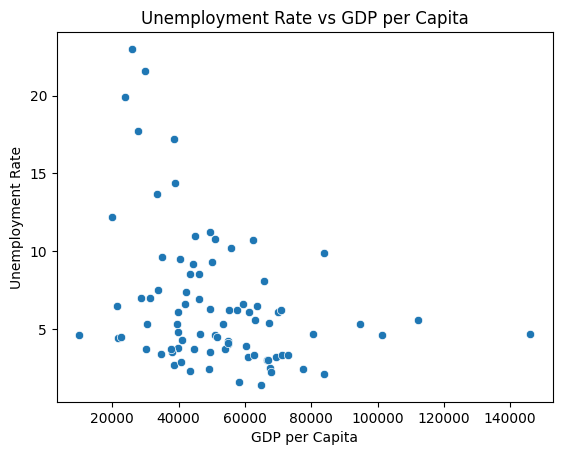

In [92]:
#We want to study the relationship between the Unemployment Rate and GDP per Capita in the dataset, so we decided to do a scatterplot:
sns.scatterplot(x=city_data['GDP per Capita'], y=city_data['Unemployment Rate'])
plt.xlabel('GDP per Capita')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate vs GDP per Capita')
plt.show()

In [95]:
#Given the scatterplot we analyzed, there is no clear pattern between the GDP and unemployment so they are not strongly related
print("1. There is no strong correlation between GDP and Unemployment Rate\n", "2.The country's GDP does not determine or affect unemployment")

1. There is no strong correlation between GDP and Unemployment Rate
 2.The country's GDP does not determine or affect unemployment


In [97]:
#Now onto finding the top five cities with the largest difference between the average monthly salary and the average cost of living:
#So we first calculate the difference between the avg. salary and avg. cost of living for each city
differences = []
for i in range(len(city_data)):
    salary = city_data['Average Monthly Salary'].iloc[i]
    cost = city_data['Average Cost of Living'].iloc[i]
    differences.append(salary - cost)
city_data['Difference of salary and living cost'] = differences

#After that, we find the top 5 cities with the most difference
cities_list = []
for i in range(len(city_data)):
    cities_list.append({'name': city_data['City_Name'].iloc[i],'country': city_data['Country'].iloc[i], 'money_left': differences[i]})

# Sort by money_left (highest first)
def get_money(city):
    return city['money_left']

cities_list.sort(key=get_money, reverse=True)

# Show top 5
for i in range(5):
    city = cities_list[i]
    print(f"{i+1}. {city['name']}, {city['country']}: €{city['money_left']:.0f}")

In [103]:
#Now onto finding the top five cities with the largest difference between the average monthly salary and the average cost of living:
#So we first calculate the difference between the avg. salary and avg. cost of living for each city
differences = []
for i in range(len(city_data)):
    salary = city_data['Average Monthly Salary'].iloc[i]
    cost = city_data['Average Cost of Living'].iloc[i]
    differences.append(salary - cost)

#After that, we find the top 5 cities with the most money left
print("\nThe top 5 cities with most money left are:")

cities_money = []
for i in range(len(city_data)):
    cities_money.append((differences[i], city_data['City_Name'].iloc[i], city_data['Country'].iloc[i]))
cities_money.sort(reverse=True)

for i in range(5):
    money, city, country = cities_money[i]
    print(f"{i+1}. {city}, {country}: {money} euros")


The top 5 cities with most money left are:
1. Basel, Switzerland: 2127 euros
2. Tampere, Finland: 1900 euros
3. Helsinki, Finland: 1850 euros
4. Zurich, Switzerland: 1774 euros
5. Geneva, Switzerland: 1531 euros



The top 5 countries with least money left are:
1. Portugal:-207.5 euros
2. Athens:-150.0 euros
3. Greece:-100.0 euros
4. Slovak Republic:-50.0 euros
5. Turkiye:-25.0 euros


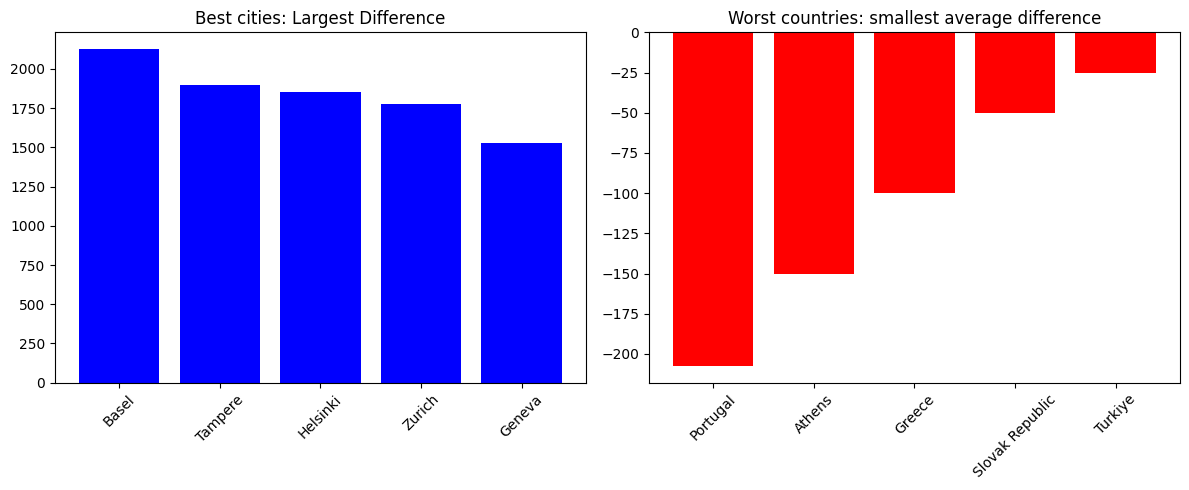

In [109]:
#Now we want to find the opposite, which are the top 5 countries with the smallest average difference
print("\nThe top 5 countries with least money left are:")

#First, we want to calculate the average money left for each country in the dataset
country_money = {}
for i in range(len(city_data)):
    country = city_data['Country'].iloc[i]
    if country not in country_money:
        country_money[country] = []
    country_money[country].append(differences[i])

#Then we calculate the averages and put money in the list for sorting it in ascending order
country_avgs = []
for country, money_list in country_money.items():
    avg_money = sum(money_list) / len(money_list)
    country_avgs.append((avg_money, country))
country_avgs.sort()

#Then we take the first 5 as they are the ones with the smallest average difference
for i in range(5):
    avg_money, country = country_avgs[i]
    print(f"{i+1}. {country}:{avg_money} euros")

#Now to show the results in meaningful visualizations:
#We are going to do two Bar charts, one for the  top 5 cities with the largest difference, and one for the top 5 countries with the smallest average difference:
plt.figure(figsize=(12, 5))

#Bar chart 1: largest difference cities
plt.subplot(1, 2, 1)
best_cities = [cities_money[i][1] for i in range(5)]
best_money = [cities_money[i][0] for i in range(5)]
plt.bar(best_cities, best_money, color='blue')
plt.title('Best cities: Largest Difference')
plt.xticks(rotation=45)

# Bar chart 2: Smallest average difference countries  
plt.subplot(1, 2, 2)
worst_countries = [country_avgs[i][1] for i in range(5)]
worst_money = [country_avgs[i][0] for i in range(5)]
plt.bar(worst_countries, worst_money, color='red')
plt.title('Worst countries: smallest average difference')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [119]:
#now we want to find the best cities for specific properties people would be seeking: 
#First, we have to find all cities for someone looking for a salary > €2000 and cost ≤ €1600:
matching_cities = []
for i in range(len(city_data)):
    salary = city_data['Average Monthly Salary'].iloc[i]
    cost = city_data['Average Cost of Living'].iloc[i]
    unemployment = city_data['Unemployment Rate'].iloc[i]
    city_name = city_data['City_Name'].iloc[i]
    country = city_data['Country'].iloc[i]
    if salary > 2000 and cost <= 1600:
        matching_cities.append({'city': city_name,'country':country,'salary':salary,'cost':cost, 'unemployment':unemployment})

#Then, we check if any cities match the specifications
if len(matching_cities) == 0:
    print("No cities found that meet both salary and cost criteria!")
    
#If none are found, we have to show why
    high_salary_cities = []
    low_cost_cities = []
    
    for i in range(len(city_data)):
        salary = city_data['Average Monthly Salary'].iloc[i]
        cost = city_data['Average Cost of Living'].iloc[i]
        city_name = city_data['City_Name'].iloc[i]
        country = city_data['Country'].iloc[i]
        if salary > 2000:
            high_salary_cities.append((city_name, country, salary))
        if cost <= 1600:
            low_cost_cities.append((city_name, country, cost))
    print(f"Cities with salary > €2000: {len(high_salary_cities)}")
    print(f"Cities with cost ≤ €1600: {len(low_cost_cities)}") 
else:
#We have to sort the cities by unemployment rate in ascending order
    def get_unemployment(city):
        return city['unemployment']
    matching_cities.sort(key=get_unemployment)
    
#Therefore, the best city would be the first one in the sorted list
    best_city = matching_cities[0]
    print(f"\nThe best city according to specification is: {best_city['city']} in {best_city['country']}")
    print(f"Its salary is: {best_city['salary']} euros")
    print(f"The cost of Living is: {best_city['cost']} euros")
    print(f" The unemployment rate is: {best_city['unemployment']}%")


The best city according to specification is: Dresden in Germany
Its salary is: 3050 euros
The cost of Living is: 1530 euros
 The unemployment rate is: 3.8%
